# Вариационный вывод для параметров $\mathcal{N}(\theta_1, \theta_2^{-1})$

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.7)

Вспомогательная функция для отрисовки графиков

In [2]:
def draw(a, sigma, alpha, beta, levels):
    '''Рисует линии уровня истинной плотности 
    и ее приближения с переданными параметрами'''
    
    density_vi = sps.gamma(a=beta, scale=1/alpha).pdf(t2)\
                 * sps.norm(loc=a, scale=sigma).pdf(t1)
    
    plt.contour(t1, t2, density, levels, 
                colors='#FF3300', linewidths=2, alpha=0.7)
    plt.contour(t1, t2, density_vi, levels, 
                colors='#00CC66', linewidths=2)
    plt.xlabel('Параметр сдвига')
    plt.ylabel('Обратный к параметру масштаба')

Сгенерируем выборку размера $n=10$ из $\mathcal{N}(0, 1)$. Далее определим параметры апостериорного распределения для равномерного априора и посчитаем его плотность по сетке.

In [3]:
# Генерация выборки
n = 10
sample = sps.norm(scale=1).rvs(size=n)

# Параметры апостериорного распределения
a = sample.mean()
sigma = np.sqrt(1/n)
alpha = n * sample.var() / 2
beta = (n-1)/2

# Вычисление апостериорной плотности по сетке
t1, t2 = np.mgrid[-3:3:0.01, 0.0:6:0.01]
density = sps.gamma(a=beta, scale=1/alpha).pdf(t2) \
          * sps.norm(loc=a, scale=sigma/np.sqrt(t2)).pdf(t1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


Реализуем вариационный байесовский вывод, взяв в качестве априорного "почти равномерный априор". Все нули взять не получится, поскольку тогда ничего не посчитается. На каждой итерации рисуем график приближения апостериорной плотности (зеленый) с помощью вариационного вывода и саму апостериорную плотность (красным).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


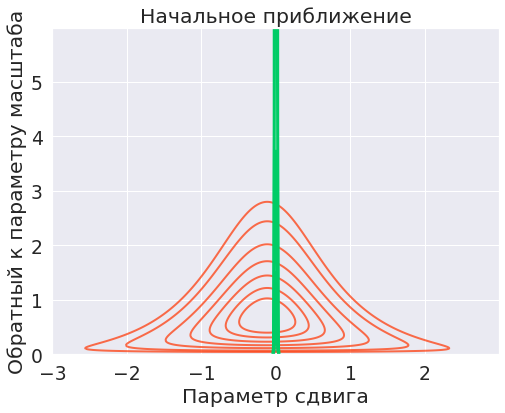

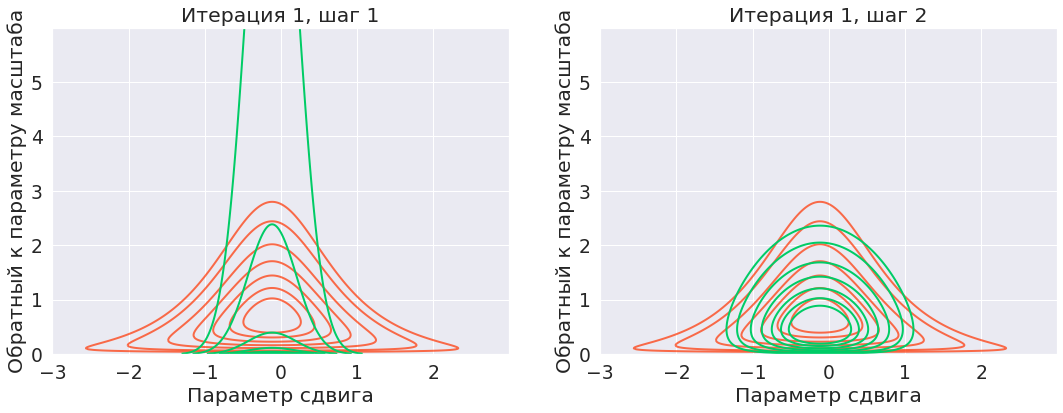

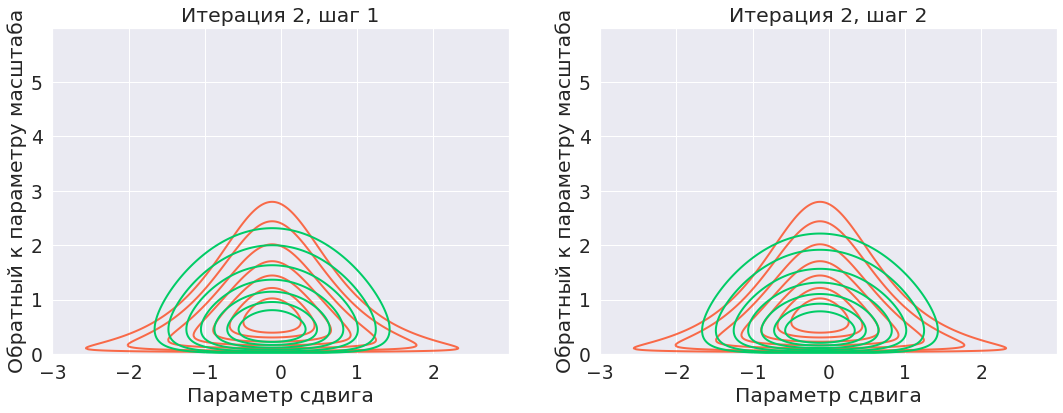

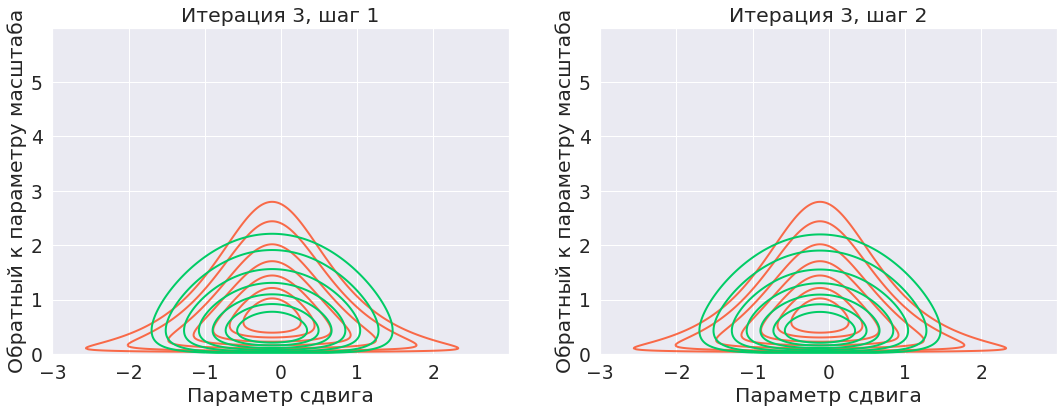

In [4]:
# Параметры априорного распределения
a = 0
sigma = 0.01
alpha = 0.01
beta = 0.01

# Линии уровня, которые нарисуются для каждой плотности
levels = [0.001, 0.005, 0.03, 0.1, 0.25, 0.5, 0.8]

fig = plt.figure(figsize=(8, 6))
draw(a, sigma, alpha, beta, levels)
plt.title('Начальное приближение')

for i in range(3):
    # Пересчет параметров на шаге 1
    a = sample.mean()
    sigma = np.sqrt(alpha / (n * beta))
    
    # Визуализация шага 1
    fig = plt.figure(figsize=(18, 6))
    plt.subplot(121)
    draw(a, sigma, alpha, beta, levels)
    plt.title('Итерация {}, шаг 1'.format(i+1))
    
    # Пересчет параметров на шаге 2
    alpha = (np.sum((sample - a) ** 2) + n * sigma**2)/2
    beta = n/2-1
        
    # Визуализация шага 2
    plt.subplot(122)
    draw(a, sigma, alpha, beta, levels)
    plt.title('Итерация {}, шаг 2'.format(i+1))

Проделаем аналогичные действия для выборки размера 100

In [5]:
# Генерация выборки
n = 100
sample = sps.norm(scale=1).rvs(size=n)

# Параметры апостериорного распределения
a = sample.mean()
sigma = np.sqrt(1/n)
alpha = n * sample.var() / 2
beta = (n-1)/2

# Вычисление апостериорной плотности по сетке
t1, t2 = np.mgrid[-0.6:0.6:0.01, 0.2:2:0.01]
density = sps.gamma(a=beta, scale=1/alpha).pdf(t2) \
          * sps.norm(loc=a, scale=sigma/np.sqrt(t2)).pdf(t1)

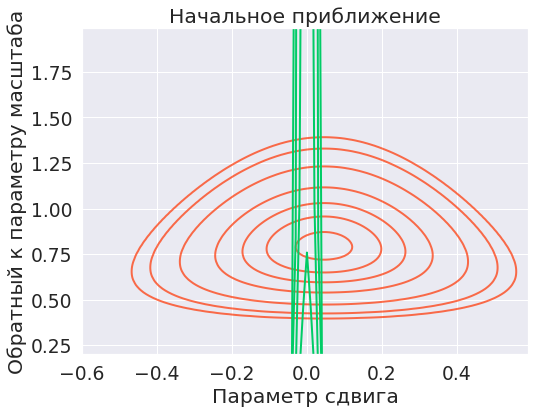

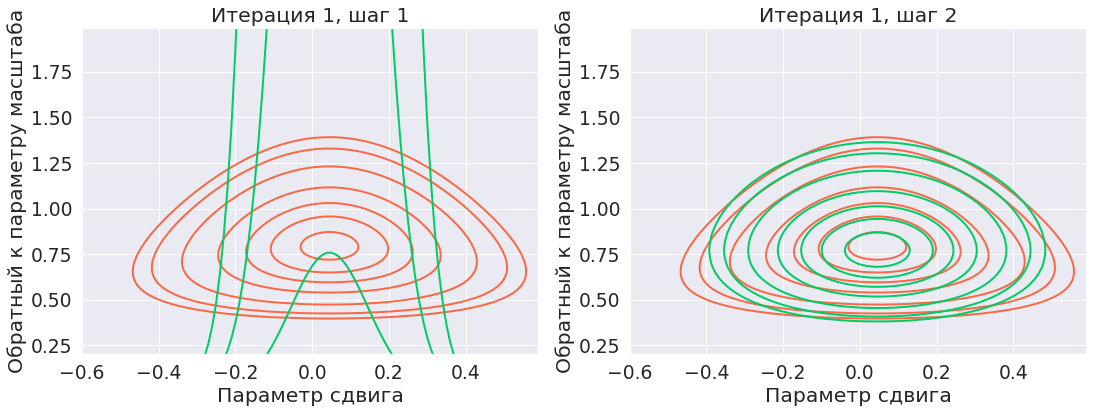

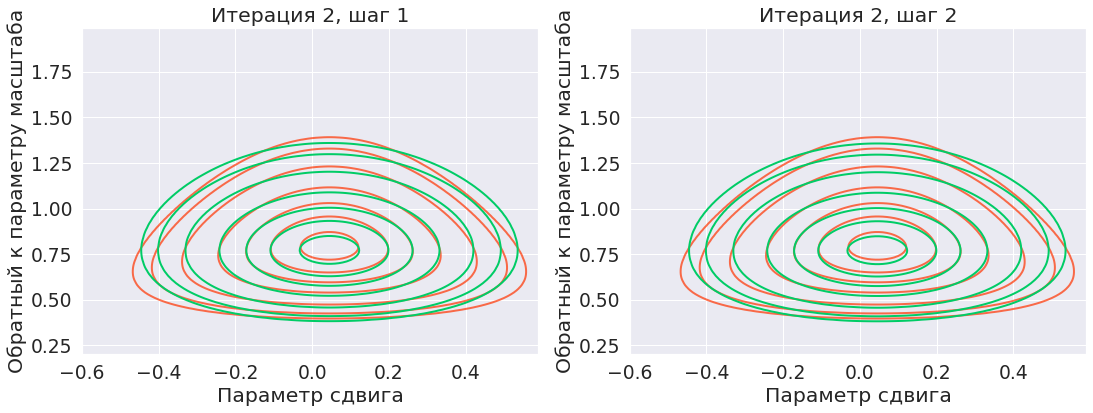

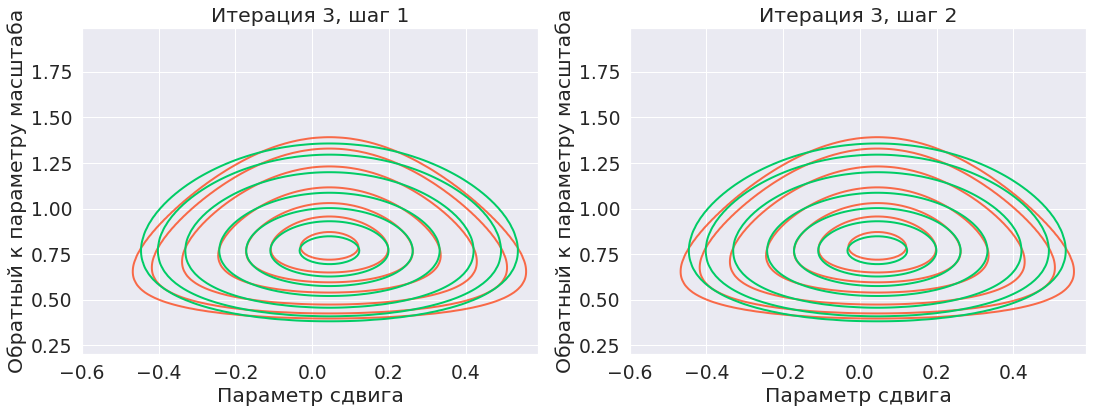

In [6]:
# Параметры априорного распределения
a = 0
sigma = 0.01
alpha = 0.01
beta = 0.01

# Линии уровня, которые нарисуются для каждой плотности
levels = [0.001, 0.005, 0.05, 0.5, 2, 5, 10]

fig = plt.figure(figsize=(8, 6))
draw(a, sigma, alpha, beta, levels)
plt.title('Начальное приближение')

for i in range(3):
    # Пересчет параметров на шаге 1
    a = sample.mean()
    sigma = np.sqrt(alpha / (n * beta))
    
    # Визуализация шага 1
    fig = plt.figure(figsize=(18, 6))
    plt.subplot(121)
    draw(a, sigma, alpha, beta, levels)
    plt.title('Итерация {}, шаг 1'.format(i+1))
    
    # Пересчет параметров на шаге 2
    alpha = (np.sum((sample - a) ** 2) + n * sigma**2)/2
    beta = n/2-1
        
    # Визуализация шага 2
    plt.subplot(122)
    draw(a, sigma, alpha, beta, levels)
    plt.title('Итерация {}, шаг 2'.format(i+1))

----------
Никита Волков

Байесовский подход в анализе данных, 2019

https://mipt-stats.gitlab.io/ 